In [92]:
%matplotlib inline
import numpy as np
import nibabel as nib
import subprocess
import tempfile
from DataLoader.utils import load_netmats
from DataLoader.MetadataHelper import *
from FSLNets.nets_glm import nets_glm
from Feature_Analysis.RFFeatureExtraction import RFFeatureExtraction
from sklearn.preprocessing import LabelEncoder


In [2]:
des = "/home/tadlington/designs/des_sex_confound_mean.mat"
con = "/home/tadlington/designs/des_sex_confound_mean.con"
netmats = load_netmats('/home/tadlington/bitbucket/HCP_500/HCP500_netmat2_460.txt')
subject_ids = [100307, 100408, 101006, 101107, 101309, 101915, 102008, 102311, 102816, 103111, 103414, 103515, 103818, 104820, 105014, 105115, 105216, 106016, 106319, 106521, 107321, 107422, 108121, 108323, 108525, 108828, 109123, 109325, 110411, 111312, 111413, 111716, 113215, 113619, 113922, 114419, 114924, 115320, 116524, 117122, 117324, 118528, 118730, 118932, 120111, 120212, 120515, 121618, 122317, 122620, 123117, 123420, 123925, 124220, 124422, 124826, 125525, 126325, 126628, 127630, 127933, 128127, 128632, 129028, 130013, 130316, 130922, 131217, 131722, 131924, 132118, 133019, 133625, 133827, 133928, 134324, 135225, 135528, 135932, 136227, 136833, 137027, 137128, 137633, 137936, 138231, 138534, 139233, 139637, 140117, 140824, 140925, 141422, 141826, 142626, 142828, 143325, 144226, 144832, 145834, 146331, 146432, 147030, 147737, 148032, 148335, 148840, 148941, 149337, 149539, 149741, 150625, 150726, 151223, 151526, 151627, 151728, 152831, 153025, 153429, 154431, 154734, 154936, 155635, 156233, 156637, 157336, 157437, 158035, 158136, 158540, 159138, 159239, 159340, 159441, 160123, 160830, 161327, 161630, 161731, 162026, 162228, 162329, 162733, 163129, 163331, 163432, 163836, 164030, 164131, 164939, 165032, 165840, 166438, 167036, 167743, 168139, 168341, 169444, 171633, 172029, 172130, 172332, 172534, 172938, 173334, 173435, 173536, 173940, 175035, 175439, 176542, 177645, 177746, 178142, 178748, 178849, 178950, 179346, 180129, 180432, 180836, 180937, 181131, 181232, 182739, 182840, 183034, 185139, 186141, 187143, 187547, 187850, 188347, 189349, 189450, 190031, 191033, 191336, 191437, 191841, 192439, 192540, 192843, 193239, 194140, 194645, 194847, 195041, 195647, 195849, 196144, 196750, 197348, 197550, 198350, 198451, 198855, 199150, 199251, 199453, 199655, 199958, 200109, 200614, 201111, 201414, 201818, 203418, 204016, 204521, 205119, 205220, 205725, 205826, 208024, 208226, 208327, 209834, 209935, 210011, 210415, 210617, 211215, 211316, 211417, 211720, 211922, 212116, 212217, 212318, 212419, 214019, 214221, 214423, 214726, 217126, 217429, 221319, 224022, 231928, 233326, 239944, 245333, 246133, 249947, 250427, 250932, 251833, 255639, 256540, 268850, 280739, 285345, 285446, 289555, 290136, 293748, 298051, 298455, 303119, 303624, 307127, 308331, 310621, 316633, 329440, 334635, 339847, 352132, 352738, 356948, 361941, 365343, 366042, 366446, 371843, 377451, 380036, 382242, 386250, 395958, 397154, 397760, 397861, 412528, 414229, 415837, 422632, 433839, 436239, 436845, 441939, 445543, 448347, 465852, 475855, 480141, 485757, 486759, 497865, 499566, 500222, 510326, 519950, 522434, 530635, 531536, 540436, 541943, 545345, 547046, 552544, 559053, 561242, 562446, 565452, 566454, 567052, 567961, 568963, 570243, 573249, 573451, 579665, 580044, 580347, 581349, 583858, 585862, 586460, 592455, 594156, 598568, 599469, 599671, 601127, 613538, 620434, 622236, 623844, 627549, 638049, 645551, 654754, 665254, 672756, 673455, 677968, 679568, 680957, 683256, 685058, 687163, 690152, 695768, 702133, 704238, 705341, 709551, 713239, 715041, 715647, 729254, 729557, 732243, 734045, 742549, 748258, 748662, 749361, 751348, 753251, 756055, 759869, 761957, 765056, 770352, 771354, 779370, 782561, 784565, 788876, 789373, 792564, 792766, 802844, 814649, 816653, 826353, 826454, 833148, 833249, 837560, 837964, 845458, 849971, 856766, 857263, 859671, 861456, 865363, 871762, 872158, 872764, 877168, 877269, 885975, 887373, 889579, 894673, 896778, 896879, 898176, 899885, 901038, 901139, 901442, 904044, 907656, 910241, 912447, 917255, 922854, 930449, 932554, 937160, 951457, 957974, 958976, 959574, 965367, 965771, 978578, 979984, 983773, 984472, 987983, 991267, 992774, 994273]
metadata = load_patient_metadata('../unrestricted_sofira_11_17_2015_6_15_1.csv', subject_measures=["Gender"], subjects=subject_ids)
print metadata.shape
le = LabelEncoder()
metadata = le.fit_transform(metadata["Gender"].values)

(460, 1)


In [3]:
p_uncorrected, p_corrected, FDRThresh = nets_glm(netmats, des, con)

1

0.00279999



In [12]:
#Get all FDR corrected eedges > 0.975 i.e. at a significance of 0.95
significant_corrected_edge_indices = (p_corrected > 0.975)
num_sig_cor_edges = sum(sum(significant_corrected_edge_indices))
print num_sig_cor_edges

significant_uncorrected_edge_indices = (p_uncorrected > 0.975)
num_sig_uncor_edges = sum(sum(significant_uncorrected_edge_indices))
print num_sig_uncor_edges
#significant_edge_pvalues


70
1304


In [53]:
#Get the corrected signifcant edges
import Feature_Analysis.EdgeUtils as EU
reload(EU)
top_glm_features, top_glm_scores = EU.get_top_n_features(p_corrected, num_sig_cor_edges)
glm_edges = EU.convert_indices_to_edges(top_glm_features, num_parcels =100)
print edges

[(56, 53), (20, 57), (57, 20), (53, 56), (50, 2), (29, 75), (2, 50), (75, 29), (11, 61), (61, 11), (27, 15), (29, 17), (48, 47), (36, 32), (17, 29), (35, 54), (77, 34), (15, 27), (54, 35), (33, 10), (50, 26), (26, 50), (34, 77), (32, 36), (47, 48), (10, 33), (86, 73), (73, 86), (67, 89), (89, 67), (55, 75), (75, 55), (67, 88), (88, 67), (58, 3), (24, 4), (3, 58), (4, 24), (15, 36), (36, 15), (51, 21), (95, 34), (34, 95), (21, 51), (83, 31), (31, 83), (60, 58), (58, 60), (86, 34), (34, 86), (77, 67), (67, 77), (67, 70), (70, 67), (88, 28), (28, 88), (10, 52), (52, 10), (2, 59), (59, 2), (22, 70), (70, 22), (86, 43), (43, 86), (51, 80), (80, 51), (27, 93), (93, 27), (50, 36), (36, 50)]


In [8]:
import Feature_Analysis.RFFeatureExtraction as RF
reload(RF)
rf = RF.RFFeatureExtraction(netmats=netmats, measures=metadata, classifier=True)

TODO fix lower limit for _gen_fine-intervals


In [54]:
feature_importances = rf.forest.feature_importances_
print feature_importances
top_rf_features, top_rf_scores = EU.get_top_n_features(feature_importances, num_sig_cor_edges)
rf_edges = EU.convert_indices_to_edges(top_rf_features, num_parcels =100)
print rf_edges

[ 0.  0.  0. ...,  0.  0.  0.]
[(50, 2), (2, 50), (36, 24), (17, 28), (67, 88), (28, 17), (24, 36), (58, 80), (88, 67), (88, 89), (23, 72), (89, 88), (34, 66), (66, 34), (80, 26), (89, 94), (26, 80), (72, 23), (80, 58), (51, 80), (24, 75), (58, 50), (53, 87), (11, 39), (80, 51), (44, 20), (23, 80), (50, 58), (99, 4), (10, 34), (94, 89), (33, 28), (10, 33), (44, 80), (81, 79), (80, 48), (36, 2), (75, 24), (10, 8), (48, 80), (75, 36), (56, 58), (22, 28), (31, 18), (40, 12), (17, 85), (54, 23), (30, 88), (77, 20), (77, 6), (34, 10), (23, 48), (89, 67), (72, 80), (73, 28), (52, 40), (80, 44), (8, 10), (73, 86), (95, 28), (64, 68), (39, 11), (49, 83), (39, 2), (37, 22), (88, 70), (80, 47), (6, 82), (51, 42), (88, 54)]


In [95]:
reload(EU)
print EU.equal_edge((1,3), (2,1))
shared_edges = EU.get_shared_edges(glm_edges, rf_edges)
print shared_edges
print len(shared_edges)
shared_parcels = EU.get_shared_parcels(glm_edges, rf_edges)
total_parcels = np.union1d(np.unique(glm_edges), np.unique(rf_edges))
print np.unique(rf_edges).shape
print np.unique(glm_edges).shape
print shared_parcels.shape
print total_parcels.shape

False
[(50, 2), (2, 50), (33, 10), (10, 33), (86, 73), (73, 86), (67, 89), (89, 67), (67, 88), (88, 67), (51, 80), (80, 51)]
12
(57,)
(48,)
(34,)
(71,)


In [64]:
np.unique([(1,2), (5,4), (1,5)])

array([1, 2, 4, 5])

280
[ 0.02857143  0.00714286  0.01071429  0.          0.00714286  0.
  0.00714286  0.          0.03214286  0.01428571  0.00357143  0.          0.
  0.01428571  0.          0.01785714  0.00357143  0.          0.01428571
  0.00714286  0.01428571  0.01785714  0.02142857  0.          0.01428571
  0.01428571  0.02857143  0.01428571  0.00357143  0.01071429  0.00714286
  0.01428571  0.03571429  0.00714286  0.03571429  0.00357143  0.
  0.01071429  0.00714286  0.          0.00357143  0.00714286  0.01071429
  0.          0.          0.01071429  0.01785714  0.00357143  0.03571429
  0.025       0.01071429  0.01071429  0.01428571  0.00714286  0.01071429
  0.00714286  0.03214286  0.00714286  0.00714286  0.00714286  0.          0.
  0.00357143  0.          0.00714286  0.03928571  0.00357143  0.
  0.01785714  0.          0.01071429  0.01428571  0.          0.025       0.
  0.02142857  0.          0.00357143  0.05357143  0.00357143  0.00357143
  0.01071429  0.          0.00357143  0.025       0.0035714

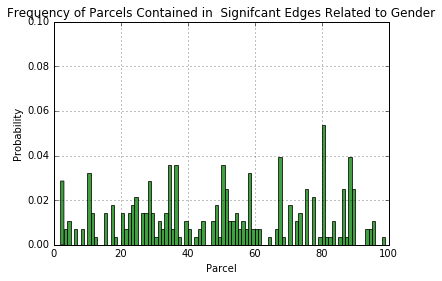

In [96]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
glm_parcels = [e[0] for e in glm_edges] + [e[1] for e in glm_edges]
rf_parcels = [e[0] for e in rf_edges] + [e[1] for e in rf_edges]
parcels = glm_parcels + rf_parcels
print len(parcels)
n, bins, patches = plt.hist(parcels, 97, normed=1, facecolor='green', alpha=0.75)
print n
print bins
print n.shape
plt.xlabel('Parcel')
plt.ylabel('Probability')
plt.title('Frequency of Parcels Contained in  Signifcant Edges Related to Gender')
plt.axis([0, 100, 0, 0.1])
plt.grid(True)

plt.show()